# __Update__

- __I have learnt a lot more since I made this. This implementation is basically right but CNNs like the Inception Algorithm (with brute force) will just be a million times better__
- __This is still a good representation of a classification neural net__
- __And yes, the accuracy is not as good as it might seem in this notebook (I think, it may actually be good, but I have near 0 data)__


**Notes about the code**

- I decided to enter the computer science prize for this term by making a program that uses AI to automatically differentiate between common moles, and melanoma (a type of skin cancer). I have built this algorithm completely from scratch, using the least amount of pre-built functions as I could, and have documented what each part of the code is doing in the code. 
- I have completed the whole algorithm and it works, but I have run into a few problems. 
    - The first being I do not have enough computational power to 'train' the algorithm, and because of this the accuracy of the algorithm is not the best (around 60%). 
    - I also do not have access to enough data (as the images are usually confidential), so the algorithm did not have great data to learn from.  

**What I would do different if I did this again**

- I would definitely try and find out how I can run this code on a more powerful machine, as just one day of training on a very good computer would take the accuracy beyond 90%. And then I would be able to optimise the algorithm better, as I would know how it has performed and then be able to alter the code to improve the algorithm

- I would implement techniques such as optimisation, normalisation, hyperparameter tuning and regularisation which I have only learnt about after I finished this project (I am taking a deep learning specialisation course over the course of five months, and I used techniques I learnt from that for this project)

- I would also try and find more data to train my algorithm on, as I only had 40 images in total, and good algorithms have around 1000 images minimum to train a good algorithm. Unfortunately there is no easy way to get these images without paying large sums of money, or breaching the law


**Notes about running the code after downloading**

- You have to press **shift+enter** to run every block of code, and you have to start from the top and go down for it to work

- **DO NOT** attempt to run this code on a machine that is not very computationally strong. If things seem like they are going wrong (the algorithm does do a lot of computation, and the computer turing fans on is normal) press the stop square at the top of the page, next to run.

- You will have to alter some parts of the code to make this algorithm run
    - Change the directory path in the 5th box down to where you have saved the algorithm, instead of where I saved the algorithm
    - You may have to pip or conda install some of the things in the code block below
 
 
Have a look at the code before running anything, it does have some outputs already saved so you can look at them beforehand (just in case the algorithm doesnt work on another computer)

**Update**

Before submission I tried changing the dimensions of my neural network a bit, and suprisingly a 10,10,5,1 NN works really well

In [1]:
# i had to sort through data to make sure I only had the data I wanted from this website https://www.fc.up.pt/addi/ph2%20database.html
# it took a very long time, but the items were sorted in a way that I couldn't figure out how to sort them with an algorithm
# you can see the sorted items in folder dermImages NonC and C
# i used the excel sheet which had the labels to get the images and their labels

import datetime as dt
import h5py
import matplotlib.pyplot as plt
import matplotlib.pylab as plb
import numpy as np
import os
import pandas as pd
from glob import glob

uint8
(574, 765, 3)


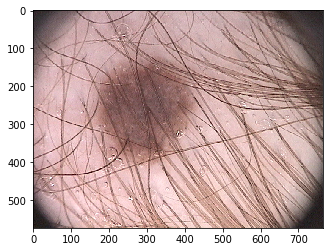

In [2]:
# load and display an image with Matplotlib
from matplotlib import image
from matplotlib import pyplot
# load image as pixel array
image = image.imread('inputs/dermImages Non C/IMD003.bmp')
# summarize shape of the pixel array
#data type
print(image.dtype)
#shape
print(image.shape)
# display the array of pixels as an image
pyplot.imshow(image)
pyplot.show()

BMP
(766, 575)
RGB


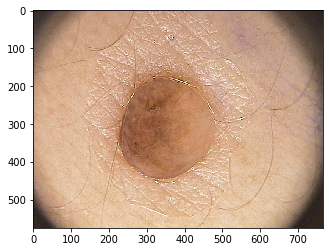

In [3]:
from PIL import Image
# Open the image form working directory
image = Image.open('inputs/dermImages Non C/IMD009.bmp')
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
# show the image
pyplot.imshow(image)
pyplot.show()

(575, 766, 3)
After trimming: (500, 700, 3)
RGB
(700, 500)


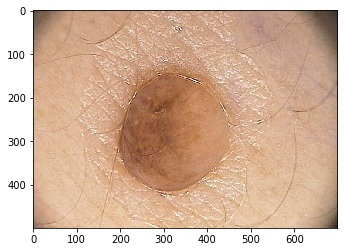

In [4]:
import numpy as np

#loading the image
image = Image.open('inputs/dermImages Non C/IMD009.bmp')
image2 = Image.open('inputs/dermImages Non C/IMD003.bmp')

#converting into numpy array
data = np.array(image)

#data.append(image2)

#print(type(data))

print(data.shape)

#print(data)


#print("Before trimming:",data.shape)

data_tr = data[30:530, 30:730]
print("After trimming:",data_tr.shape)

#Image.fromarray(im_trim).save('trim_kolala.jpeg')


#print(data_tr[0])

image3 = Image.fromarray(data_tr)
#print(type(image3))

# summarize image details
print(image3.mode)
print(image3.size)

pyplot.imshow(image3)
pyplot.show()


In [5]:

"""
Saves compressed, resized images as HDF5 datsets
Returns
    data.h5, where each dataset is an image or class label
    e.g. X23,y23 = image and corresponding class label
"""

start = dt.datetime.now()
# ../input/
PATH = os.path.abspath(os.path.join('/Users/AasmaanY/Desktop/MelanomaProject', 'inputs'))
#PATH = os.path.abspath(os.path.join('/MelanomaProject', 'inputs'))

# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "dermImages Non C")
# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.bmp"))
# Load labels
labels = pd.read_csv('/Users/AasmaanY/Desktop/MelanomaProject/inputs/labels.csv')
#labels = pd.read_csv('/MelanomaProject/inputs/labels.csv')

# Set the disease type you want to look for
#disease="Infiltration"

# Size of data
NUM_IMAGES = len(images)
HEIGHT = 500
WIDTH = 700
CHANNELS = 3
SHAPE = (HEIGHT, WIDTH, CHANNELS)

print("working?")

''' below here please ignore all comments with "#", that was me just working out how to get the data sorted which probably will be the hardest part of the project'''

for i,img in enumerate(images):
    '''enumerate takes all objects and lays them out 1 by 1 to loop through'''
    # Images
    #image = cv2.imread(img)
    '''opening the image'''
    imageTemp = Image.open(img)
    '''converting from an image into a multi dimensional array dimensions - (height,width,channels)'''
    image = np.asarray(imageTemp)
    '''trimming the array to make them all the same size'''
    image = image[30:530, 30:730]
    #print(image.shape)
    #print(i)
    #image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
    
    '''reshaping the array into a (1,h*w*c) shaped matrix'''
    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))
    
    '''below in comments is many things that I tried to get this to work (I have another python file showing all the stuff that didnt work)'''
    #imageCarryOver = image0
    
    #print(imageCarryOver.shape)
    #print("split")
    
    #print(image0.shape)
    
    #imageFinalArray1 = np.vstack((image0, imageCarryOver))
    #imageFinalArray = np.vstack((imageFinalArray1, imageCarryOver))
    
    #print(imageFinalArray.shape)
    '''below is stacking the row vectors on top of each other to make a (m,h*w*c) matrix'''
    '''where m is the number of images'''
    
    if i != 0:
        imageFinalArray = np.vstack((imageFinalArray, image0))
    else:
        imageFinalArray = image0
    
    #print(imageFinalArray.shape)

'''-------------------------------------------------------------------------------------------------------------'''

'''the bit above was for non melanoma images, bit below is for melanoma images'''

'''-------------------------------------------------------------------------------------------------------------'''

PATH = os.path.abspath(os.path.join('/Users/AasmaanY/Desktop/MelanomaProject', 'inputs'))
# ../input/sample/images/
SOURCE_IMAGES = os.path.join(PATH, "dermImages C")
# ../input/sample/images/*.png
images = glob(os.path.join(SOURCE_IMAGES, "*.bmp"))

for i,img in enumerate(images):
    '''enumerate takes all objects and lays them out 1 by 1 to loop through'''
    # Images
    #image = cv2.imread(img)
    '''opening the image'''
    imageTemp = Image.open(img)
    '''converting from an image into a multi dimensional array dimensions - (height,width,channels)'''
    image = np.asarray(imageTemp)
    '''trimming the array to make them all the same size'''
    image = image[30:530, 30:730]
    #print(image.shape)
    #print(i)
    #image = cv2.resize(image, (WIDTH,HEIGHT), interpolation=cv2.INTER_CUBIC)
    
    '''reshaping the array into a (1,h*w*c) shaped matrix'''
    image0 = image.reshape((1,HEIGHT*WIDTH*CHANNELS))
    
    '''below in comments is many things that I tried to get this to work (I have another python file showing all the stuff that didnt work)'''
    #imageCarryOver = image0
    
    #print(imageCarryOver.shape)
    #print("split")
    
    #print(image0.shape)
    
    #imageFinalArray1 = np.vstack((image0, imageCarryOver))
    #imageFinalArray = np.vstack((imageFinalArray1, imageCarryOver))
    
    #print(imageFinalArray.shape)
    '''below is stacking the row vectors on top of each other to make a (m,h*w*c) matrix'''
    '''where m is the number of images'''
    imageFinalArray = np.vstack((imageFinalArray, image0))

    
print(imageFinalArray.shape)
print("final output : ")

'''transposing the array (swapping the dimensions), changing name to train input dataset'''
'''dividing by 255 to normalize dataset (all values will be between 0 & 1)'''
train_x = imageFinalArray.T/255
print(train_x.shape)
#print(train_x)

working?
(40, 1050000)
final output : 
(1050000, 40)


In [6]:
'''below are the labels for each image'''
'''1 represents yes the image is positive for Melanoma, 0 is negative'''

train_y = np.array([[0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,
0,                      
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1,
1]])

print(train_y.shape)

(1, 40)


In [7]:
def initialize_parameters_deep(layer_dims):  
    """
    Arguments:
    layer_dims -- python array (list) containing the dimensions of each layer in our network
    
    Returns:
    parameters -- python dictionary containing your parameters "W1", "b1", ..., "WL", "bL":
                    Wl -- weight matrix of shape (layer_dims[l], layer_dims[l-1])
                    bl -- bias vector of shape (layer_dims[l], 1)
    """

    np.random.seed(3)   #seed for random so I get the same answer everytime, whilst still being random
    parameters = {}     #creating dictionary
    L = len(layer_dims)            # number of layers in the network

    for l in range(1, L):       #for every layer in total number of layers in NN

        ''' initializing the weight for every layer, making random so all of them dont behave exactly the same '''
        parameters['W' + str(l)] = np.random.randn(layer_dims[l],layer_dims[l-1]) * 0.01
        '''biases, similar to weights'''
        parameters['b' + str(l)] = np.zeros((layer_dims[l],1))

        '''making sure the weights and biases will be the correct dimensions'''
        assert(parameters['W' + str(l)].shape == (layer_dims[l], layer_dims[l-1]))
        assert(parameters['b' + str(l)].shape == (layer_dims[l], 1))

    '''returning the dictionary'''
    
    #print(parameters)
    
    return parameters

In [8]:
parameters = initialize_parameters_deep([5,4,3])


''' just checking if code is working below here, uncomment and re comment to see kind of what it does'''
#print("W1 = " + str(parameters["W1"]))
#print("b1 = " + str(parameters["b1"]))
#print("W2 = " + str(parameters["W2"]))
#print("b2 = " + str(parameters["b2"]))

' just checking if code is working below here, uncomment and re comment to see kind of what it does'

In [9]:
def linear_forward(A, W, b):
    """
    Implement the linear part of a layer's forward propagation.

    Arguments:
    A -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)

    Returns:
    Z -- the input of the activation function, also called pre-activation parameter 
    cache -- a python tuple containing "A", "W" and "b" ; stored for computing the backward pass efficiently
    """
    
    '''calculating Z, which is an intermidiate step to calculating A - the prediction output from a layer'''
    Z = np.dot(W,A)+b
    
    '''making sure the shape of the matrix is correct'''
    assert(Z.shape == (W.shape[0], A.shape[1]))
    '''cache for things that will be useful later on during back propagation'''
    cache = (A, W, b)
    
    '''returning Z and cache for later on'''
    return Z, cache

In [10]:
'''testing stuff'''

A = np.asarray([[ 1.62434536,-0.61175641],[-0.52817175,-1.07296862],[ 0.86540763,-2.3015387 ]])
W = np.asarray([[ 1.74481176,-0.7612069,0.3190391 ]])
b = np.asarray([[-0.24937038]])

Z, linear_cache = linear_forward(A, W, b)
print("Z = " + str(Z))

Z = [[ 3.26295336 -1.23429988]]


In [11]:
'''Ive got another file called dnn_utils_v2 where I have the code for the activation functions'''
'''The activation functions are sigmoid, then its inverse, relu and its inverse'''
from dnn_utils_v2 import sigmoid, sigmoid_backward, relu, relu_backward
from dnn_app_utils_v3 import predict

In [12]:
def linear_activation_forward(A_prev, W, b, activation):
    """
    Implement the forward propagation for the LINEAR->ACTIVATION layer

    Arguments:
    A_prev -- activations from previous layer (or input data): (size of previous layer, number of examples)
    W -- weights matrix: numpy array of shape (size of current layer, size of previous layer)
    b -- bias vector, numpy array of shape (size of the current layer, 1)
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"

    Returns:
    A -- the output of the activation function, also called the post-activation value 
    cache -- a python tuple containing "linear_cache" and "activation_cache";
             stored for computing the backward pass efficiently
    """
    
    '''sigmoid and relu are types of functions to help get more normalised outputs, they are called activation functions'''
    if activation == "sigmoid":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        '''Calculating Z, and the cache from previous function'''
        Z, linear_cache = linear_forward(A_prev,W,b)
        '''calculating the actual prediction value for this layer node'''
        A, activation_cache = sigmoid(Z)
    
    elif activation == "relu":
        # Inputs: "A_prev, W, b". Outputs: "A, activation_cache".
        '''similar to sigmoid, but with relu activation funciton instead'''
        Z, linear_cache = linear_forward(A_prev,W,b) 
        A, activation_cache = relu(Z)

    
    assert (A.shape == (W.shape[0], A_prev.shape[1]))
    cache = (linear_cache, activation_cache)

    return A, cache

In [13]:
'''testing stuff'''
A_prev = np.asarray([[-0.41675785, -0.05626683],
 [-2.1361961,   1.64027081],
 [-1.79343559, -0.84174737]])

W = np.asarray([[ 0.50288142, -1.24528809, -1.05795222]])

b = np.asarray([[-0.90900761]])

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "sigmoid")
print("With sigmoid: A = " + str(A))

A, linear_activation_cache = linear_activation_forward(A_prev, W, b, activation = "relu")
print("With ReLU: A = " + str(A))

With sigmoid: A = [[0.96890023 0.11013289]]
With ReLU: A = [[3.43896134 0.        ]]


In [14]:
def L_model_forward(X, parameters):
    """
    Implement forward propagation for the [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID computation
    
    Arguments:
    X -- data, numpy array of shape (input size, number of examples)
    parameters -- output of initialize_parameters_deep()
    
    Returns:
    AL -- last post-activation value
    caches -- list of caches containing:
                every cache of linear_activation_forward() (there are L-1 of them, indexed from 0 to L-1)
    """

    caches = []
    A = X
    L = len(parameters) // 2                  # number of layers in the neural network
    
    '''Implement [LINEAR -> RELU]*(L-1). Add "cache" to the "caches" list'''
    for l in range(1, L):
        A_prev = A 
        
        A, cache = linear_activation_forward(A_prev, parameters["W"+str(l)], parameters["b"+str(l)],"relu")
        caches.append(cache)
        
    '''Implement LINEAR -> SIGMOID. Add "cache" to the "caches" list'''

    AL, cache = linear_activation_forward(A, parameters["W"+str(L)], parameters["b"+str(L)],"sigmoid")
    caches.append(cache)
    
    assert(AL.shape == (1,X.shape[1]))
            
    return AL, caches

In [15]:
'''testing stuff'''
np.random.seed(6)
X = np.random.randn(5,4)
W1 = np.random.randn(4,5)
b1 = np.random.randn(4,1)
W2 = np.random.randn(3,4)
b2 = np.random.randn(3,1)
W3 = np.random.randn(1,3)
b3 = np.random.randn(1,1)

parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2,
              "W3": W3,
              "b3": b3}
np.random.seed(3)

AL, caches = L_model_forward(X, parameters)
print("AL = " + str(AL))
print("Length of caches list = " + str(len(caches)))

AL = [[0.03921668 0.70498921 0.19734387 0.04728177]]
Length of caches list = 3


In [16]:

def compute_cost(AL, Y):
    """
    Implement the cost function defined by equation (7).

    Arguments:
    AL -- probability vector corresponding to your label predictions, shape (1, number of examples)
    Y -- true "label" vector (for example: containing 0 if negative, 1 if positive), shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost
    """
    
    m = Y.shape[1]

    '''Compute loss from aL and y.'''
   
    logprobs = np.multiply(np.log(AL),Y) + np.multiply(np.log(1-AL),(1-Y))
    cost = -(1/m)*np.sum(logprobs)
    
    cost = np.squeeze(cost)      # To make sure your cost's shape is what we expect (e.g. this turns [[17]] into 17).
    assert(cost.shape == ())
    
    return cost

In [17]:
'''testing stuff'''

Y = np.array([[1, 1, 0]])
AL = np.array([[.8,.9,0.4]])

print("cost = " + str(compute_cost(AL, Y)))

cost = 0.2797765635793422


In [18]:

def linear_backward(dZ, cache):
    """
    Implement the linear portion of backward propagation for a single layer (layer l)

    Arguments:
    dZ -- Gradient of the cost with respect to the linear output (of current layer l)
    cache -- tuple of values (A_prev, W, b) coming from the forward propagation in the current layer

    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    A_prev, W, b = cache
    m = A_prev.shape[1]

    '''calculating derivates (gradients) of the cost function with respect to different variables'''
    dW = (1/m)*(np.dot(dZ,A_prev.T))
    db = (1/m)*np.sum(dZ, axis = 1, keepdims = True)
    dA_prev = np.dot(W.T,dZ)

    
    assert (dA_prev.shape == A_prev.shape)
    assert (dW.shape == W.shape)
    assert (db.shape == b.shape)
    
    return dA_prev, dW, db

In [19]:
'''testing'''

np.random.seed(1)
dZ = np.random.randn(3,4)
A = np.random.randn(5,4)
W = np.random.randn(3,5)
b = np.random.randn(3,1)
linear_cache = (A, W, b)

np.random.seed(3)


dA_prev, dW, db = linear_backward(dZ, linear_cache)
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

dA_prev = [[-1.15171336  0.06718465 -0.3204696   2.09812712]
 [ 0.60345879 -3.72508701  5.81700741 -3.84326836]
 [-0.4319552  -1.30987417  1.72354705  0.05070578]
 [-0.38981415  0.60811244 -1.25938424  1.47191593]
 [-2.52214926  2.67882552 -0.67947465  1.48119548]]
dW = [[ 0.07313866 -0.0976715  -0.87585828  0.73763362  0.00785716]
 [ 0.85508818  0.37530413 -0.59912655  0.71278189 -0.58931808]
 [ 0.97913304 -0.24376494 -0.08839671  0.55151192 -0.10290907]]
db = [[-0.14713786]
 [-0.11313155]
 [-0.13209101]]


In [20]:

def linear_activation_backward(dA, cache, activation):
    """
    Implement the backward propagation for the LINEAR->ACTIVATION layer.
    
    Arguments:
    dA -- post-activation gradient for current layer l 
    cache -- tuple of values (linear_cache, activation_cache) we store for computing backward propagation efficiently
    activation -- the activation to be used in this layer, stored as a text string: "sigmoid" or "relu"
    
    Returns:
    dA_prev -- Gradient of the cost with respect to the activation (of the previous layer l-1), same shape as A_prev
    dW -- Gradient of the cost with respect to W (current layer l), same shape as W
    db -- Gradient of the cost with respect to b (current layer l), same shape as b
    """
    linear_cache, activation_cache = cache
    
    '''calculating gradients depending on the activation function used for that layer'''
    if activation == "relu":
        dZ = relu_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)

    elif activation == "sigmoid":
        #print(linear_cache)
        #print(activation_cache)
        
        dZ = sigmoid_backward(dA, activation_cache)
        dA_prev, dW, db = linear_backward(dZ,linear_cache)
    
    return dA_prev, dW, db

In [21]:
'''testing'''

np.random.seed(2)
dAL = np.random.randn(1,2)
A = np.random.randn(3,2)
W = np.random.randn(1,3)
b = np.random.randn(1,1)
Z = np.random.randn(1,2)
linear_cache = (A, W, b)
activation_cache = Z
linear_activation_cache = (linear_cache, activation_cache)

np.random.seed(3)

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "sigmoid")
print ("sigmoid:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db) + "\n")

#print(dAL)

dA_prev, dW, db = linear_activation_backward(dAL, linear_activation_cache, activation = "relu")
print ("relu:")
print ("dA_prev = "+ str(dA_prev))
print ("dW = " + str(dW))
print ("db = " + str(db))

sigmoid:
dA_prev = [[ 0.11017994  0.01105339]
 [ 0.09466817  0.00949723]
 [-0.05743092 -0.00576154]]
dW = [[ 0.10266786  0.09778551 -0.01968084]]
db = [[-0.05729622]]

relu:
dA_prev = [[ 0.44090989 -0.        ]
 [ 0.37883606 -0.        ]
 [-0.2298228   0.        ]]
dW = [[ 0.44513824  0.37371418 -0.10478989]]
db = [[-0.20837892]]


In [22]:

def L_model_backward(AL, Y, caches):
    """
    Implement the backward propagation for the [LINEAR->RELU] * (L-1) -> LINEAR -> SIGMOID group
    
    Arguments:
    AL -- probability vector, output of the forward propagation (L_model_forward())
    Y -- true "label" vector (containing 0, 1)
    caches -- list of caches containing:
                every cache of linear_activation_forward() with "relu" (it's caches[l], for l in range(L-1) i.e l = 0...L-2)
                the cache of linear_activation_forward() with "sigmoid" (it's caches[L-1])
    
    Returns:
    grads -- A dictionary with the gradients
             grads["dA" + str(l)] = ... 
             grads["dW" + str(l)] = ...
             grads["db" + str(l)] = ... 
    """
    grads = {}
    L = len(caches) # the number of layers
    m = AL.shape[1]
    Y = Y.reshape(AL.shape) # after this line, Y is the same shape as AL
    
    # Initializing the backpropagation

    dAL = - (np.divide(Y, AL) - np.divide(1 - Y, 1 - AL))

    
    # Lth layer (SIGMOID -> LINEAR) gradients. Inputs: "dAL, current_cache". Outputs: "grads["dAL-1"], grads["dWL"], grads["dbL"]

    current_cache = caches[L-1]
    grads["dA" + str(L-1)], grads["dW" + str(L)], grads["db" + str(L)] = linear_activation_backward(dAL, current_cache, "sigmoid")
    #print(str(L-1))

    
    # Loop from l=L-2 to l=0
    for l in reversed(range(L-1)):
        # lth layer: (RELU -> LINEAR) gradients.
        # Inputs: "grads["dA" + str(l + 1)], current_cache". Outputs: "grads["dA" + str(l)] , grads["dW" + str(l + 1)] , grads["db" + str(l + 1)] 

        #print("this is l : " + str(l))
        current_cache = caches[l]
        dA_prev_temp, dW_temp, db_temp = linear_activation_backward(grads["dA" + str(l+1)], current_cache, "relu")
        grads["dA" + str(l)] = dA_prev_temp
        grads["dW" + str(l + 1)] = dW_temp
        grads["db" + str(l + 1)] = db_temp


    return grads

In [23]:
'''testing'''

np.random.seed(3)
AL = np.random.randn(1, 2)
Y_assess = np.array([[1, 0]])

A1 = np.random.randn(4,2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
Z1 = np.random.randn(3,2)
linear_cache_activation_1 = ((A1, W1, b1), Z1)

A2 = np.random.randn(3,2)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
Z2 = np.random.randn(1,2)
linear_cache_activation_2 = ((A2, W2, b2), Z2)

caches = (linear_cache_activation_1, linear_cache_activation_2)

grads = L_model_backward(AL, Y_assess, caches)
#print(grads)

In [24]:

def update_parameters(parameters, grads, learning_rate):
    """
    Update parameters using gradient descent
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients, output of L_model_backward
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
                  parameters["W" + str(l)] = ... 
                  parameters["b" + str(l)] = ...
    """
    
    L = len(parameters) // 2 # number of layers in the neural network

    # Update rule for each parameter

    for l in range(L):
        #print("this is l" + str(l))
        parameters["W" + str(l+1)] = parameters["W" + str(l+1)] - learning_rate*grads["dW" + str(l+1)]
        parameters["b" + str(l+1)] = parameters["b" + str(l+1)] - learning_rate*grads["db" + str(l+1)]

    return parameters

In [25]:

np.random.seed(2)
W1 = np.random.randn(3,4)
b1 = np.random.randn(3,1)
W2 = np.random.randn(1,3)
b2 = np.random.randn(1,1)
parameters = {"W1": W1,
              "b1": b1,
              "W2": W2,
              "b2": b2}
np.random.seed(3)
dW1 = np.random.randn(3,4)
db1 = np.random.randn(3,1)
dW2 = np.random.randn(1,3)
db2 = np.random.randn(1,1)
grads = {"dW1": dW1,
         "db1": db1,
         "dW2": dW2,
         "db2": db2}



parameters = update_parameters(parameters, grads, 0.1)

print ("W1 = "+ str(parameters["W1"]))
print ("b1 = "+ str(parameters["b1"]))
print ("W2 = "+ str(parameters["W2"]))
print ("b2 = "+ str(parameters["b2"]))

W1 = [[-0.59562069 -0.09991781 -2.14584584  1.82662008]
 [-1.76569676 -0.80627147  0.51115557 -1.18258802]
 [-1.0535704  -0.86128581  0.68284052  2.20374577]]
b1 = [[-0.04659241]
 [-1.28888275]
 [ 0.53405496]]
W2 = [[-0.55569196  0.0354055   1.32964895]]
b2 = [[-0.84610769]]


In [26]:
#This is the shape of the neural network, num inputs followed by hidden layer 'nodes' and then the 1 represents the output node

layers_dims = [1050000, 10, 10, 5, 1]

In [27]:
def L_layer_model(X, Y, layers_dims, learning_rate = 0.33, num_iterations = 200, print_cost=False):#lr was 0.009
    """
    0.075
    Implements a L-layer neural network: [LINEAR->RELU]*(L-1)->LINEAR->SIGMOID.
    
    Arguments:
    X -- data, numpy array of shape (num_px * num_px * 3, number of examples)
    Y -- true "label" vector (containing 0 negative, 1 if positive), of shape (1, number of examples)
    layers_dims -- list containing the input size and each layer size, of length (number of layers + 1).
    learning_rate -- learning rate of the gradient descent update rule
    num_iterations -- number of iterations of the optimization loop
    print_cost -- if True, it prints the cost every 100 steps
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """

    np.random.seed(1)
    costs = []                         # keep track of cost
    
    # Parameters initialization. (≈ 1 line of code)

    parameters = initialize_parameters_deep(layers_dims)

    
    # Loop (gradient descent)
    for i in range(0, num_iterations):

        # Forward propagation: [LINEAR -> RELU]*(L-1) -> LINEAR -> SIGMOID.

        AL, caches = L_model_forward(X,parameters)

        
        # Compute cost.

        cost = compute_cost(AL,Y)

    
        # Backward propagation.

        grads = L_model_backward(AL,Y,caches)

 
        # Update parameters.

        parameters = update_parameters(parameters,grads,learning_rate)

                
        # Print the cost every 100 training example
        if print_cost and i % 10 == 0:
            #print ("Cost after iteration %i: %f" %(i, cost))
            print ("Cost after iteration " + str(i) + ": " + str(cost))
        if print_cost and i % 10 == 0:
            costs.append(cost)
        if print_cost and (i % 50) == 0 and i != 0:
            plt.plot(np.squeeze(costs))
            plt.ylabel('cost')
            plt.xlabel('iterations (per hundreds)')
            plt.title("Learning rate =" + str(learning_rate))
            plt.show()

    # plot the cost
    plt.plot(np.squeeze(costs))
    plt.ylabel('cost')
    plt.xlabel('iterations (per hundreds)')
    plt.title("Learning rate =" + str(learning_rate))
    plt.show()
    
    return parameters

(1050000, 40)
(1, 40)
[1050000, 10, 10, 5, 1]
try changing the learning rate in the function above, it changes the cost quite a bit


As you can see the cost will go down, but unfortunately I don't have access to supercomputers so I can't train the algorithm for days without starting a bonfire inside my computer.


But in principle with more computational power I can implement more techniques such as regularisation, normalisation and momentum that will make the algorithm more accurate


With more computational power, this algorithm can learn much, much quicker. If I did have enough computation power, I would train 


I would recommend learning rate 0.33 iterations 200, and wait until training is finished to see graph


Cost after iteration 0: 0.693150984912912
Cost after iteration 10: 0.6931496783818137
Cost after iteration 20: 0.6931488096952201
Cost after iteration 30: 0.6931482528101679
Cost after iteration 40: 0.6931478648360003
Cost after iteration 50: 0.6931475760364605


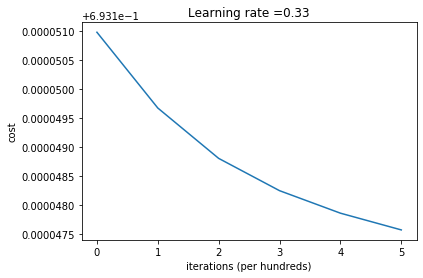

Cost after iteration 60: 0.6931473540726226
Cost after iteration 70: 0.6931471818247147
Cost after iteration 80: 0.6931470390273148
Cost after iteration 90: 0.6931469370487913
Cost after iteration 100: 0.6931467910249035


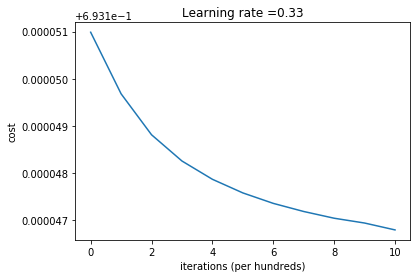

Cost after iteration 110: 0.6931466250653412
Cost after iteration 120: 0.6931463933142237
Cost after iteration 130: 0.6931460820671099
Cost after iteration 140: 0.6931457051745001
Cost after iteration 150: 0.6931452427146668


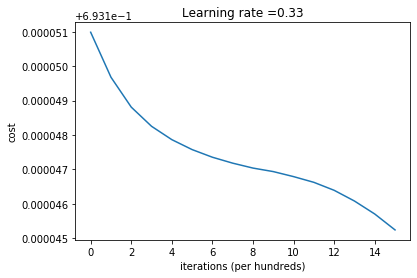

Cost after iteration 160: 0.6931447572086021
Cost after iteration 170: 0.6931441530789844
Cost after iteration 180: 0.693143409786636
Cost after iteration 190: 0.6931425014926914


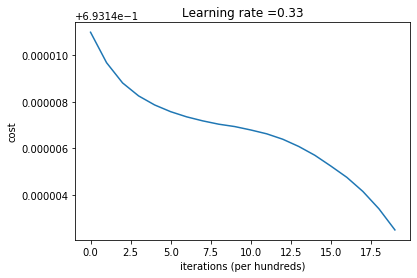

In [28]:
print(train_x.shape)
print(train_y.shape)
print(layers_dims)

print("try changing the learning rate in the function above, it changes the cost quite a bit")
print('\n')
print("As you can see the cost will go down, but unfortunately I don't have access to supercomputers so I can't train the algorithm for days without starting a bonfire inside my computer.")
print('\n')
print("But in principle with more computational power I can implement more techniques such as regularisation, normalisation and momentum that will make the algorithm more accurate")
print('\n')
print("With more computational power, this algorithm can learn much, much quicker. If I did have enough computation power, I would train ")
print('\n')
print("I would recommend learning rate 0.33 iterations 200, and wait until training is finished to see graph")
print('\n')

parameters = L_layer_model(train_x, train_y, layers_dims, num_iterations = 200, print_cost = True)



In [50]:
print("\n")
print("These are the prediction accuracies with the minimal data and computational power I have")
print("\n")

predictions_train = predict(train_x, train_y, parameters)



These are the prediction accuracies with the minimal data and computational power I have


Accuracy: 0.8


In [ ]:
#learning rate 0.33 accuracy = 0.575 200 iterations
#learning rate 0.1 iteration 520 cost 0.60661 - gone down until then, but jumps back up after that to 0.697 and then algo continues again
#learning rate 0.075 - 0.025 is the best learning rate in the long term
